In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

### Load Scores and Profile Sizes

In [1]:
def getScores():
    resultDir = "../results/"
    if not os.path.exists(resultDir):
        os.makedirs(resultDir)
    size = loadProfileSizes()

In [2]:
def loadProfileSizes():
    profileSize = dict()
    inFile = open("../data/ProfileSizes.txt")

    for line in inFile:
        entity, size = line.strip().split("\t")
        entity = entity.replace("#profile","")
        entity = entity.replace("http://purl.obolibrary.org/obo/","")
        profileSize[entity] = int(size)

    inFile.close()
    return profileSize

In [3]:
def loadProfiles():
    inFile = open("../data/Scores_Sizes.txt")

    scores = []
    geneProfileSizes = []
    taxonProfileSizes = []

    rawscores = []
    rawGeneProfileSizes = []
    rawTaxonProfileSizes = []

    for line in inFile:
        if "Score" not in line:
            data = line.strip().split("\t")
            score = float(data[6])
            scores.append(score)
            rawGeneProfileSizes.append(int(data[1]))
            rawTaxonProfileSizes.append(int(data[4]))
    inFile.close()
    return scores, rawTaxonProfileSizes, rawGeneProfileSizes

In [6]:
getScores()
scores, rawTaxonProfileSizes, rawGeneProfileSizes = loadProfiles()

# Taxon Profile Sizes

Let's look at taxon profile sizes vs. scores. First, we can plot all of the data to see what the scatter looks like.

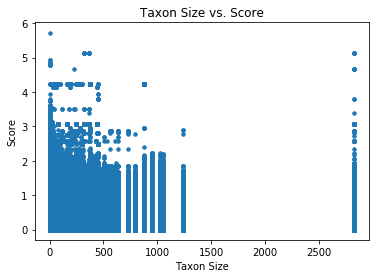

In [15]:
figureDir = "../ACMManuscript/Figures/"

plt.scatter(np.array(rawTaxonProfileSizes), np.array(scores), s=1)
plt.xlabel('Taxon Size')
plt.ylabel('Score')
plt.title('Taxon Size vs. Score')
plt.show()

The range of taxon sizes is pretty high, so it's hard to see enough detail.

Let's load the data into a Pandas DataFrame so we can start to filter the data and create more granular plots.

In [14]:
taxonAndScores = pd.DataFrame(
    {
        'taxonSizes': rawTaxonProfileSizes,
        'scores': scores
    })
taxonAndScores.head()

,scores,taxonSizes
0,0.096137,22
1,0.329889,162
2,0.329889,157
3,0.379192,1029
4,0.065285,34


### How should we split the data?

Let's make a histogram to see the distribution of taxon sizes. This will help give a better sense of how to split the data in order to get more detail in our scatter plots.

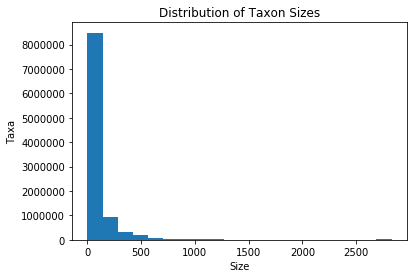

In [20]:
taxonAndScores['taxonSizes'].plot(kind='hist', bins=20, title='Distribution of Taxon Sizes', legend=False)
plt.xlabel('Size')
plt.ylabel('Taxa')
plt.show()

It looks like the vast majority of observations are of taxon sizes between 0-250. We can split these observations into smaller parts and make several scatter plots. This should show more detail in each the graphs.

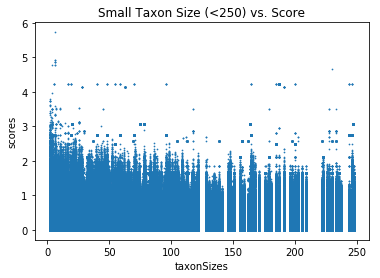

In [24]:
smallTaxa = taxonAndScores[taxonAndScores['taxonSizes'] < 250]
smallTaxa.plot('taxonSizes', 'scores', s=0.5, kind='scatter', title='Taxon Size (<250) vs. Score')
plt.xlabel('Taxon Size')
plt.ylabel('Score')
plt.show()

This is still too messy. Let's split this down even further. Hopefully we'll be able to make out more individual points if we focus on much smaller chunks at a time.

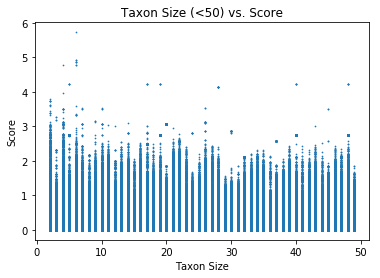

In [25]:
smallTaxa = taxonAndScores[taxonAndScores['taxonSizes'] < 50]
smallTaxa.plot('taxonSizes', 'scores', s=0.5, kind='scatter', title='Taxon Size (<50) vs. Score')
plt.xlabel('Taxon Size')
plt.ylabel('Score')
plt.show()

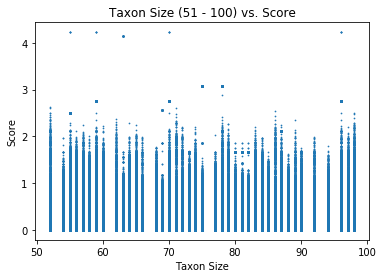

In [29]:
smallTaxa = taxonAndScores[(taxonAndScores['taxonSizes'] > 50) & (taxonAndScores['taxonSizes'] < 100)]
smallTaxa.plot('taxonSizes', 'scores', s=0.5, kind='scatter', title='Taxon Size (51 - 100) vs. Score')
plt.xlabel('Taxon Size')
plt.ylabel('Score')
plt.show()

### Still messy!

These are still pretty hard to make out anything useful. It looks like each size has many scores resulting in these vertical bars in the plot.

Let's try taking the average of the scores for each given size and see if that helps.

In [33]:
taxonAndAvgScores = taxonAndScores.groupby('taxonSizes', as_index=False)['scores'].mean()
taxonAndAvgScores.rename(columns={'scores':'avgScores'}, inplace=True)
taxonAndAvgScores.head()

,taxonSizes,avgScores
0,2,0.146084
1,3,0.169026
2,4,0.176314
3,5,0.169552
4,6,0.208292


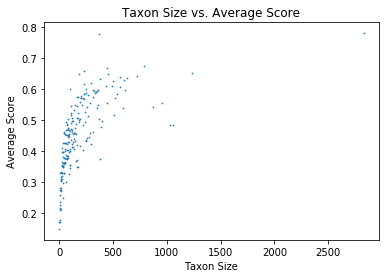

In [34]:
taxonAndAvgScores.plot('taxonSizes', 'avgScores', s=0.5, kind='scatter', title='Taxon Size vs. Average Score')
plt.xlabel('Taxon Size')
plt.ylabel('Average Score')
plt.show()

### Wow, this looks a lot better! 

It looks like we can start to make out a shape in this plot. Let's split the scatter plot again and see how they look.

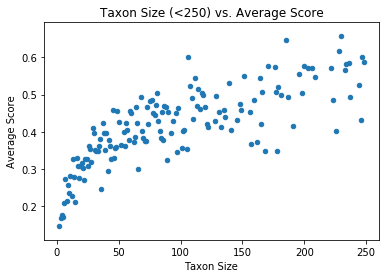

In [39]:
smallTaxa = taxonAndAvgScores[taxonAndAvgScores['taxonSizes'] < 250]
smallTaxa.plot('taxonSizes', 'avgScores', kind='scatter', title='Taxon Size (<250) vs. Average Score')
plt.xlabel('Taxon Size')
plt.ylabel('Average Score')
plt.show()

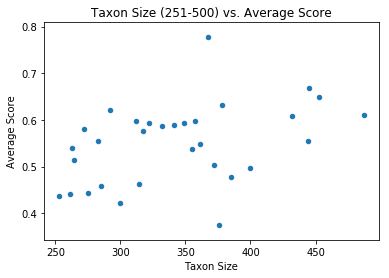

In [40]:
mediumTaxa = taxonAndAvgScores[(taxonAndAvgScores['taxonSizes'] > 250) & (taxonAndAvgScores['taxonSizes'] < 500)]
mediumTaxa.plot('taxonSizes', 'avgScores', kind='scatter', title='Taxon Size (251-500) vs. Average Score')
plt.xlabel('Taxon Size')
plt.ylabel('Average Score')
plt.show()

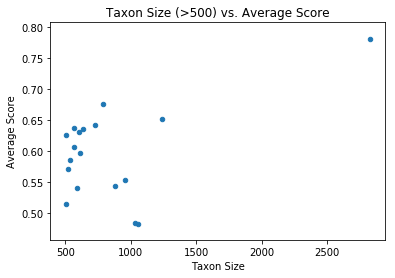

In [41]:
largeTaxa = taxonAndAvgScores[taxonAndAvgScores['taxonSizes'] > 500]
largeTaxa.plot('taxonSizes', 'avgScores', kind='scatter', title='Taxon Size (>500) vs. Average Score')
plt.xlabel('Taxon Size')
plt.ylabel('Average Score')
plt.show()